## Step- 1: Business Problem Understanding

* **Let's figure out what factors influence its revenue.**

## Step- 2: Data Understanding
* **Collecting Data And Loading it.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Walmart_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Data Understanding

* **Let's figure out what factors influence its revenue. Can factors such as air temperature and fuel cost influence the success of a huge company along with the purchasing power index and seasonal discounts? And how does machine learning minimize costs and increase economic impact?**

#### The data contains the following columns:

**Store:** Store number

**Date:** Sales week start date

**Weekly_Sales:** Sales

**Holiday_Flag:** Mark on the presence or absence of a holiday

**Temperature:** Air temperature in the region

**Fuel_Price:** Fuel cost in the region

**CPI:** Consumer price index

**Unemployment:** Unemployment rate


## Data Exploration

In [3]:
df.shape

(6435, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
continous=["Weekly_Sales" ,"Temperature","Fuel_Price", "CPI","Unemployment"]
discrete=["Store","Holiday_flag"]

In [6]:
df[continous].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


In [7]:
df[continous].skew()

Weekly_Sales    0.668362
Temperature    -0.336768
Fuel_Price     -0.096158
CPI             0.063492
Unemployment    1.188144
dtype: float64

## Feature Transformation

* As the Unemployment is Right skewed so we need to perform feature transformation.
* Temperature and fuel Price is sidly Left skewed but we can work with that data.

In [8]:
df['log_Unemployment']=np.log(df['Unemployment'])
df['log_Unemployment'].skew()

0.09970257895662032

In [9]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,log_Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2.092605
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2.092605
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2.092605
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2.092605
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2.092605
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2.161482
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2.159523
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2.159523
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2.159523


## Plots

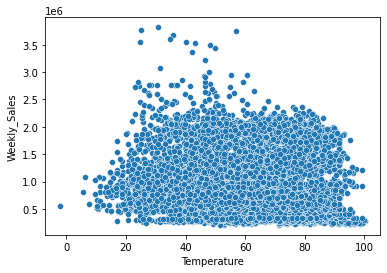

In [10]:
sns.scatterplot(y='Weekly_Sales',x='Temperature',data=df)
plt.show()

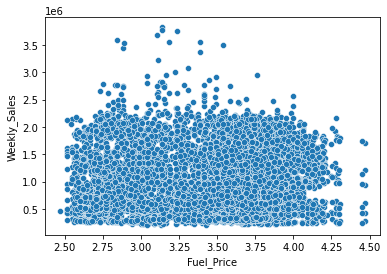

In [11]:
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=df)
plt.show()

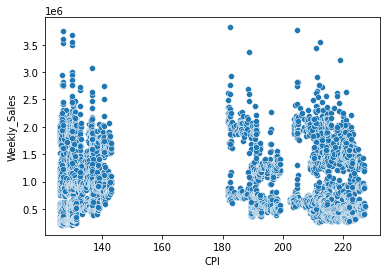

In [12]:
sns.scatterplot(x='CPI',y='Weekly_Sales',data=df)
plt.show()

In [13]:
df[continous].corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


## Step- 3: Data Preprocessing

#### Data Cleaning

In [14]:
df.isnull().sum()

Store               0
Date                0
Weekly_Sales        0
Holiday_Flag        0
Temperature         0
Fuel_Price          0
CPI                 0
Unemployment        0
log_Unemployment    0
dtype: int64

In [15]:
df.duplicated().sum()

0

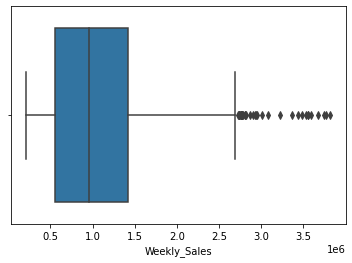

In [16]:
sns.boxplot(x=df["Weekly_Sales"])
plt.show()

In [17]:
# Calculate Q1
Q1=df["Weekly_Sales"""].quantile(0.25)
print("Q1:",Q1)

# calculate Q3
Q3=df["Weekly_Sales"].quantile(0.75)
print("Q3:",Q3)

#Calculating IQR
IQR = Q3-Q1
print("IQR:",IQR)

#Calculate Lower Limit of outliers
lower_limit =Q1-(IQR*1.5)
print("Lower Limit:",lower_limit)

#Calculate upper Limit of outlier
upper_limit=Q3+(IQR*1.5)
print("Upper Limit",upper_limit)

Q1: 553350.105
Q3: 1420158.66
IQR: 866808.5549999999
Lower Limit: -746862.7275
Upper Limit 2720371.4924999997


In [18]:
df[(df["Weekly_Sales"]<lower_limit)|(df["Weekly_Sales"]>upper_limit)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,log_Unemployment
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163,2.099612
241,2,23-12-2011,3224369.80,0,46.66,3.112,218.999550,7.441,2.007005
471,4,26-11-2010,2789469.45,1,48.08,2.752,126.669267,7.127,1.963890
474,4,17-12-2010,2740057.14,0,46.57,2.884,126.879484,7.127,1.963890
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127,1.963890
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143,1.637637
526,4,16-12-2011,2771397.17,0,36.44,3.149,129.898065,5.143,1.637637
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143,1.637637
761,6,24-12-2010,2727575.18,0,55.07,2.886,212.916508,7.007,1.946910
1329,10,26-11-2010,2939946.38,1,55.33,3.162,126.669267,9.003,2.197558


In [19]:
df[(df["Weekly_Sales"]<lower_limit)|(df["Weekly_Sales"]>upper_limit)].sum()

Store                                                             435
Date                24-12-201023-12-201126-11-201017-12-201024-12-...
Weekly_Sales                                             104948594.12
Holiday_Flag                                                        9
Temperature                                                    1369.6
Fuel_Price                                                    107.617
CPI                                                       5425.122289
Unemployment                                                   251.83
log_Unemployment                                            67.683179
dtype: object

#### We can't remove this many data so, we need to consider this data.

In [20]:
sales_by_week = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

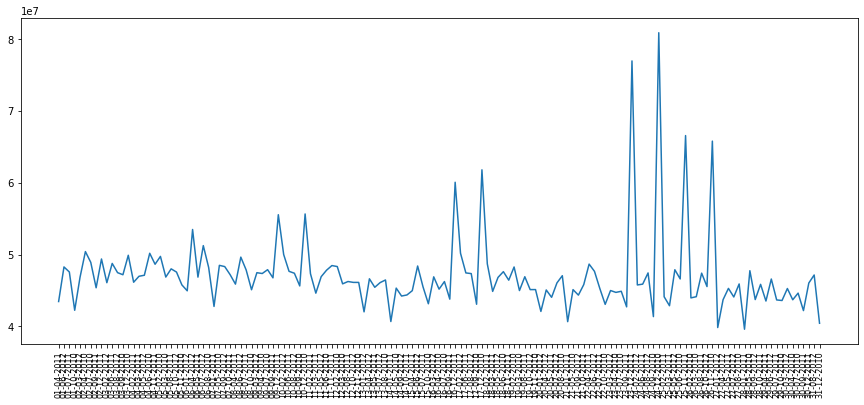

In [21]:
plt.figure(figsize=(15,6))
plt.plot(sales_by_week['Date'],sales_by_week['Weekly_Sales'])
plt.xticks(rotation='vertical',size=8)
plt.show()

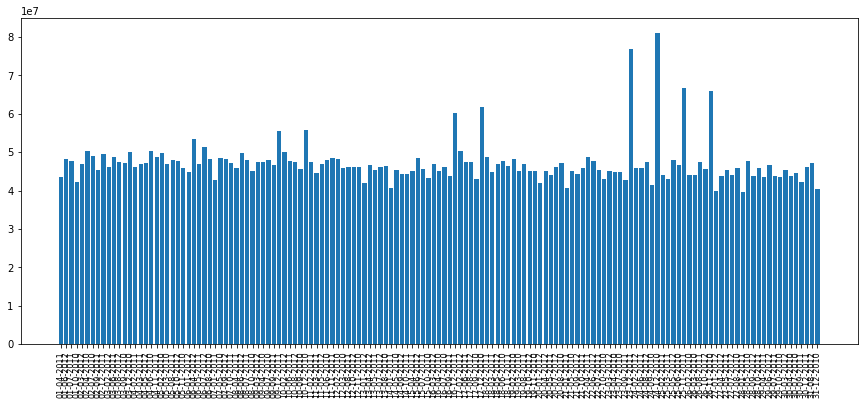

In [22]:
plt.figure(figsize=(15,6))
plt.bar(sales_by_week['Date'],sales_by_week['Weekly_Sales'])
plt.xticks(rotation='vertical',size=8)
plt.show()

### DISPLAY WHICH STORE HAVE MOST WEEKLY SALES

In [23]:
Store_sales = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].sum())
Store_sales = Store_sales.sort_values('Weekly_Sales',ascending=False)

In [24]:
df["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

### TOP 10 MOST POPULAR STORES

In [25]:
Store_sales[:10]

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


In [26]:
Holiday_sales = pd.DataFrame(df.groupby('Holiday_Flag')['Weekly_Sales'].sum())
Holiday_sales = Holiday_sales.sort_values('Weekly_Sales',ascending=False)

In [27]:
Holiday_sales[:5]

,Weekly_Sales
Holiday_Flag,
0,6.231919e+09
1,5.052996e+08


### Bar Plot

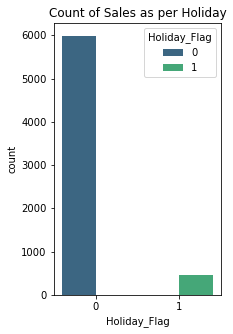

In [28]:
plt.figure(figsize=(3,5))
sns.countplot(x='Holiday_Flag', hue='Holiday_Flag', data=df, palette='viridis')
plt.title('Count of Sales as per Holiday')
plt.show()

## Pair Plot

* Includes all the graph in one

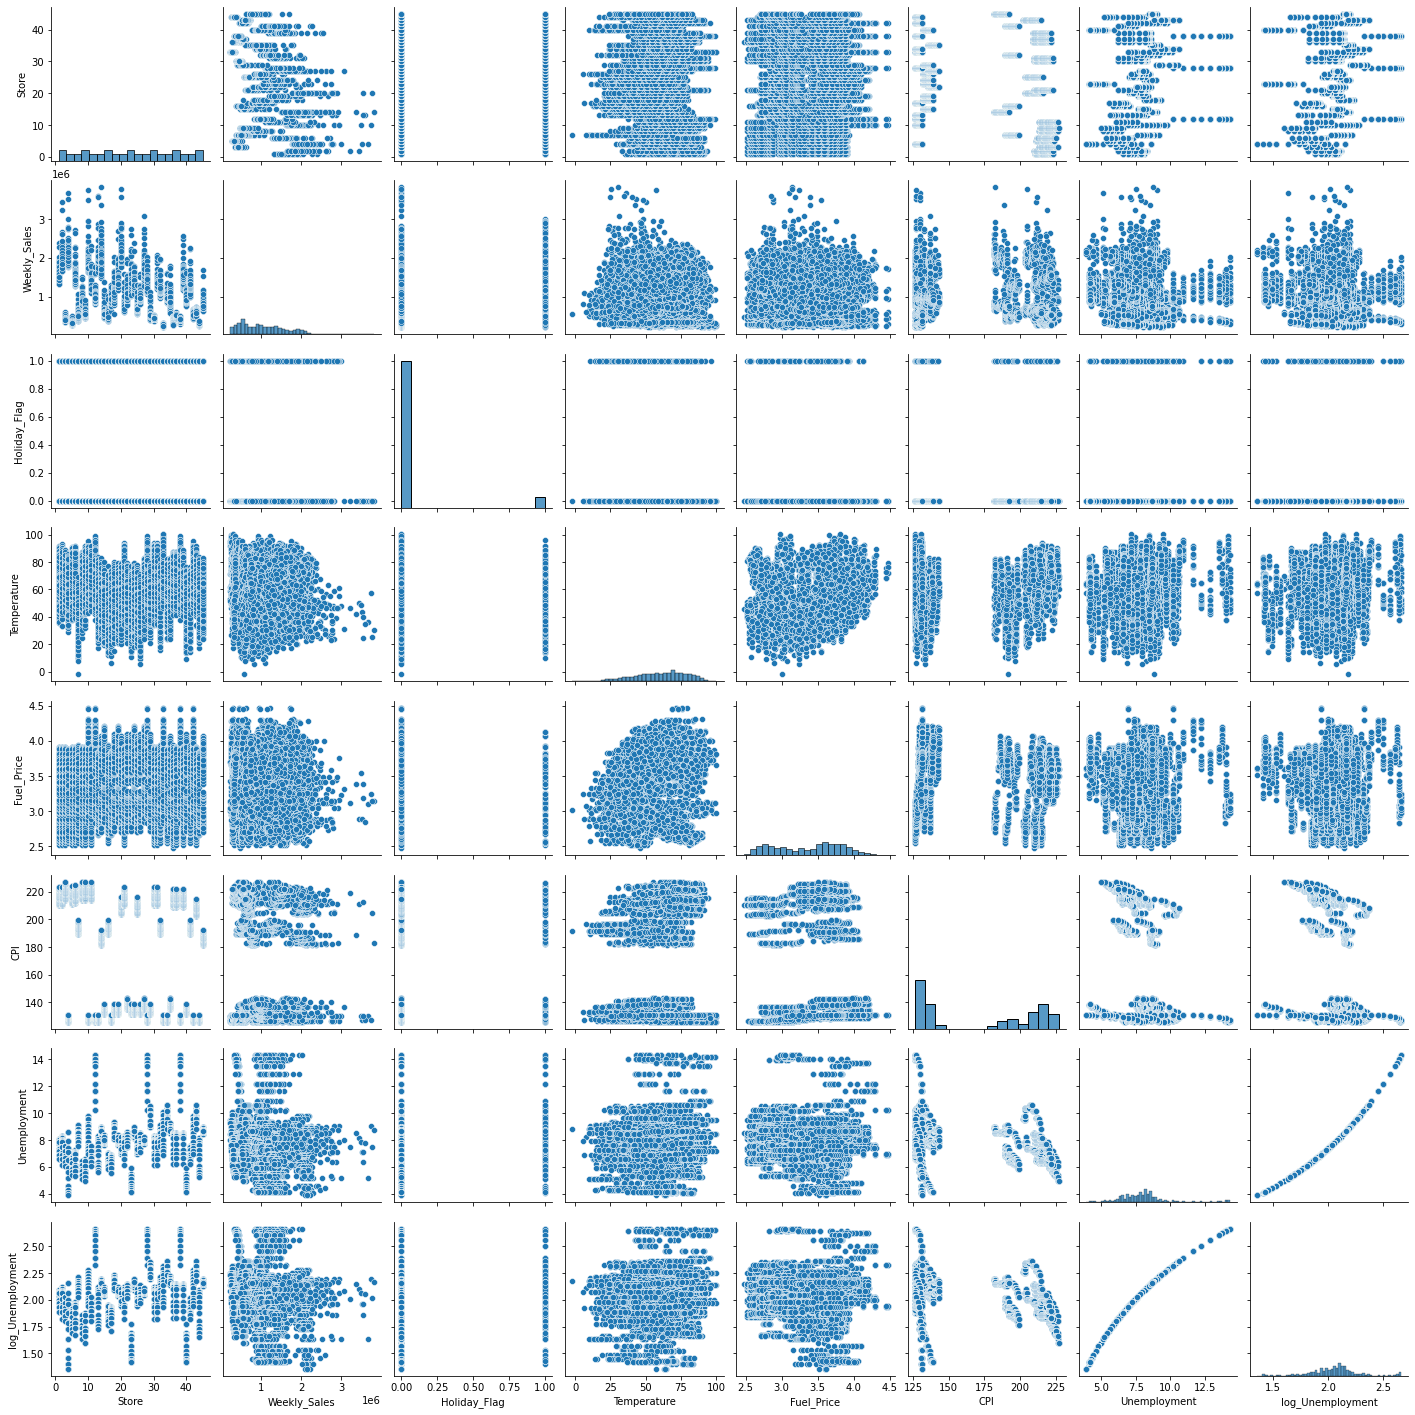

In [29]:
sns.pairplot(df)
plt.show()

## Heat Graph

* For featuring the correlation between 2 variables

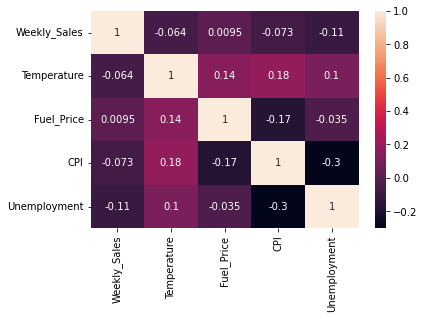

In [30]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

## Machine Learning Model

## X&y

In [43]:
X = df[["Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"]]
y = df["Weekly_Sales"]

## To identify the best random state number

In [44]:
Train = []
CV = []

for i in range(0,100):
   from sklearn.model_selection import train_test_split
   X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    
   from sklearn.linear_model import LinearRegression
   model = LinearRegression()
   model.fit(X_train,y_train)

   ypred_train = model.predict(X_train)
    
   from sklearn.metrics import r2_score
   Train.append(r2_score(y_train,ypred_train))
    
   from sklearn.model_selection import cross_val_score
   CV.append(cross_val_score(model,X_train,y_train,cv=5).mean())

In [33]:
sale = pd.DataFrame({"Train":Train,"CV":CV})
sale

,Train,CV
0,0.134674,0.132665
1,0.143113,0.140406
2,0.147478,0.145001
3,0.139798,0.134414
4,0.146383,0.143585
...,...,...
95,0.135562,0.128569
96,0.136608,0.135633
97,0.145226,0.139537
98,0.145014,0.141787


In [45]:
sale = pd.DataFrame({"Train":Train,"CV":CV})
gm = sale[(abs(sale["Train"]-sale["CV"])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.tolist()[0]
print("Best Random State Number : ",rs)

Best Random State Number :  35


## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

## Step - 4 : Modelling

In [47]:
X_train

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1156,0,66.07,2.780,213.899046,6.384
5102,0,58.31,3.133,217.878134,7.716
3293,0,36.73,2.919,131.735000,8.326
2322,0,60.07,2.853,126.234600,6.885
5650,0,65.25,3.815,135.446800,4.584
...,...,...,...,...,...
5910,1,49.67,3.148,127.087677,9.003
3915,0,53.35,3.430,127.995250,14.021
1428,0,72.71,4.449,131.149968,6.943
4367,0,91.56,3.682,215.136382,7.852


In [48]:
# Modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("Coefficients:", model.coef_)
print("Intercept :", model.intercept_)

Coefficients: [ 78345.02578704   -484.25389072 -17341.84663865  -1834.41073476
 -45459.99067286]
Intercept : 1808596.9272496575


In [49]:
# Prediction
test_predictions = model.predict(X_test)

## Step - 5: Evaluation Metrics

In [50]:
print("Test R2: ", model.score(X_test,y_test))

Test R2:  0.004737437888333251


## Model Selection
#### Check whether model has overfitting or underfitting problem

In [51]:
#Short method for finding r2 score
train_predictions = model.predict(X_train)
print("Train R2 : ",model.score(X_train,y_train))

Train R2 :  0.02993521325115056


In [52]:
#Cross Validation on Train data
from sklearn.model_selection import cross_val_score
print("Cross Validation Score : ",cross_val_score(model,X_train,y_train,cv=5).mean())

Cross Validation Score :  0.02707790940743391


In [53]:
#Prediction on test data
ypred_test = model.predict(X_test)

from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Test R2: 0.004737437888333251


In [54]:
model.predict([[1,55,3.391,140.11,9.121]])

C:\Users\priya\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1129841.924121])

In [56]:
(1*78345.02578704)+(55*-484.25389072)+(3.391*-17341.84663865)+(140.11*-1834.41073476)+(9.121* -45459.99067286)+1808596.9272496575

1129841.9241210555

## Check for Assumptions

### 1. Linearity of Errors

In [57]:
test_res = y_test - test_predictions

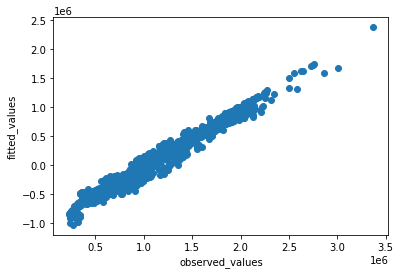

In [58]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

### 2. Normality of Error

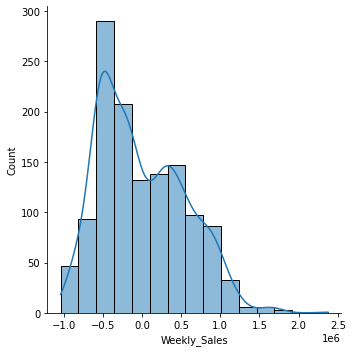

In [59]:
sns.displot(test_res,bins=15,kde=True)
plt.show()

### 3. Equal Variance of Errors(Homoscadesicity)

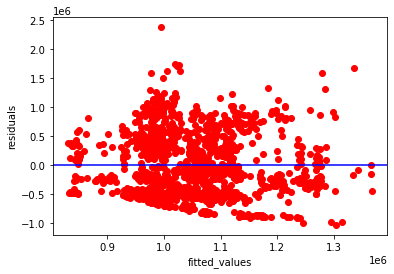

In [60]:
plt.scatter(test_predictions,test_res,c= "r")
plt.axhline(y=0,color="blue")
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

### 4. Variables Significance Hypothesis Testing for variables

In [61]:
import statsmodels.formula.api as smf
model1 = smf.ols("y~X",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           5.93e-34
Time:                        16:25:34   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.727e+06   7.98e+04     21.646      0.000    1.57e+06    1.88e+06
X[0]        7.489e+04   2.76e+04      2.710      0.007    2.07e+04    1.29e+05
X[1]        -724.1715    400.461     -1.808      0.071   -1509.207      60.864
X[2]       -1.017e+04   1.58e+04     -0.645      0.519   -4.11e+04    2.07e+04
X[3]       -1598.8717    195.127     -8.194      0.000   -1981.385   -1216.358
X[4]       -4.155e+04   3972.660    -10.460      0.000   -4.93e+04   -3.38e+04
==============================================================================
Omnibus:                      365.109   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.212
Skew:                           0.633   Prob(JB):                     3.81e-94
Kurtosis:                       3.007   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


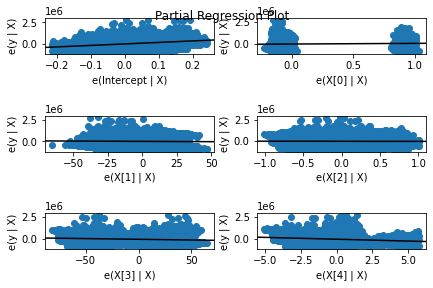

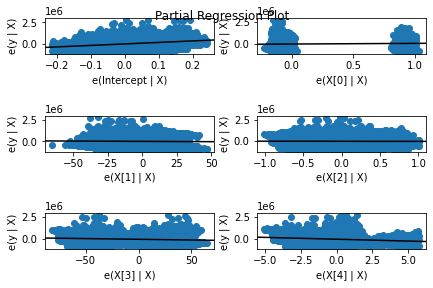

In [62]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)